In [27]:
import numpy as np
import pandas as pd

In [28]:
df = pd.read_csv('/content/data.csv')

In [29]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [30]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [31]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],random_state=12)

In [33]:
# scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
# fit on training data
knn.fit(x_train, y_train)
# prediction on test data
y_pred = knn.predict(x_test)
# check accuracy
from sklearn.metrics import accuracy_score
print('accuracy_score : ', accuracy_score(y_test, y_pred))

accuracy_score :  0.958041958041958


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, fixed

def load_data():
    cancer = datasets.load_breast_cancer()
    return cancer

def plot_decision_boundaries(n_neighbors, data, labels):
    h = .02
    cmap_light = ListedColormap(['orange', 'blue'])
    cmap_bold = ListedColormap(['darkorange', 'darkblue'])

    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(data, labels)

    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5, 4))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'2-Class classification (k = {n_neighbors})')
    plt.show()

cancer = load_data()

# Use only the first two features and standardize them.
X = StandardScaler().fit_transform(cancer.data[:, :2])
y = cancer.target

# Interactive widget
interact(plot_decision_boundaries, n_neighbors=(1, 20), data=fixed(X), labels=fixed(y))

interactive(children=(IntSlider(value=10, description='n_neighbors', max=20, min=1), Output()), _dom_classes=(…

<function __main__.plot_decision_boundaries(n_neighbors, data, labels)>

In [36]:
# how to work knn

scores = []
# check k-value between 1 to 16 for effect on results
for i in range(1, 16):
  # select k-value
  knn = KNeighborsClassifier(n_neighbors=i)
  # scaling data
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  x_train_scaled = sc.fit_transform(x_train)
  x_test_scaled = sc.transform(x_test)
  # fit on scaled training data
  knn.fit(x_train_scaled, y_train)
  # predicted on scaled test data
  y_pred = knn.predict(x_test_scaled)
  # check accuracy
  from sklearn.metrics import accuracy_score
  scores.append(accuracy_score(y_test, y_pred))

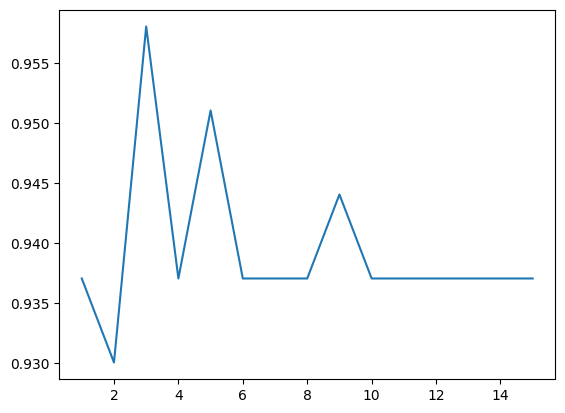

In [37]:
# plot scores
import matplotlib.pyplot as plt
plt.plot(range(1,16),scores)